In [ ]:
from fastbook import *
from fastai.callback.tracker import SaveModelCallback
from tqdm.auto import tqdm
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = Path('./images_xray/images/train/')

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(512, method=ResizeMethod.Squish), 
    batch_tfms = [IntToFloatTensor(), Brightness(max_lighting = 0.2, p = 0.2), Contrast(max_lighting = 0.4, p = 0.4), *aug_transforms(size=512, flip_vert=True), Normalize.from_stats(*imagenet_stats)]
    )
dls = dblock.dataloaders(path, bs=64)

In [ ]:
xb, yb = dls.one_batch()

xb.shape, yb.shape

(torch.Size([64, 3, 512, 512]), torch.Size([64]))

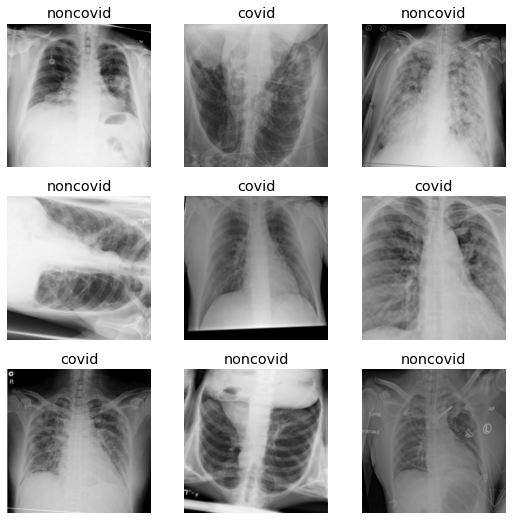

In [ ]:
dls.train.show_batch(max_n=9, nrows=3)

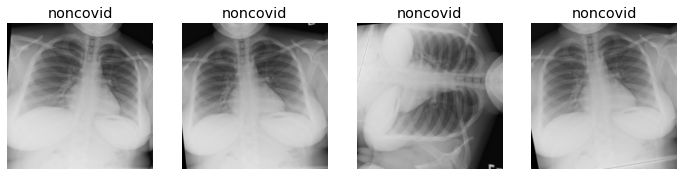

In [ ]:
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
learn = cnn_learner(dls, 
                    resnet34, 
                    metrics=[accuracy, 
                             Precision(), 
                             Recall(), 
                             F1Score()]).to_fp16()

SuggestedLRs(valley=tensor(6.9183e-06))

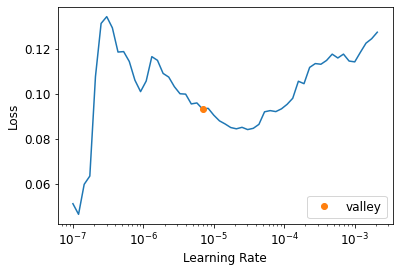

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(epochs=10,
          base_lr=6.9183e-06,
          cbs=[SaveModelCallback(monitor='f1_score')])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.108085,0.103499,0.967708,0.952562,0.988189,0.970048,00:54


Better model found at epoch 0 with f1_score value: 0.9700483091787439.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.105677,0.108129,0.968750,0.952652,0.990157,0.971042,01:04
1,0.092307,0.101284,0.968750,0.952652,0.990157,0.971042,01:05
2,0.095078,0.103071,0.969792,0.954459,0.990157,0.971981,01:05
3,0.100201,0.107234,0.968750,0.952652,0.990157,0.971042,01:06
4,0.102063,0.112048,0.968750,0.950943,0.992126,0.971098,01:06
5,0.101268,0.101125,0.969792,0.954459,0.990157,0.971981,01:06
6,0.097300,0.098598,0.970833,0.956274,0.990157,0.972921,01:06
7,0.095828,0.093584,0.972917,0.959924,0.990157,0.974806,01:06
8,0.098603,0.114449,0.968750,0.950943,0.992126,0.971098,01:06
9,0.102842,0.097665,0.971875,0.958095,0.990157,0.973863,01:06


Better model found at epoch 0 with f1_score value: 0.971042471042471.
Better model found at epoch 2 with f1_score value: 0.9719806763285023.
Better model found at epoch 6 with f1_score value: 0.9729206963249517.
Better model found at epoch 7 with f1_score value: 0.9748062015503876.


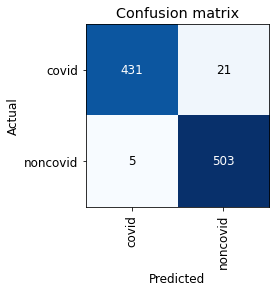

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]